# import statements

In [1]:
import torch.nn.functional as F
import torch
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import log_loss
import pandas as pd
#from scipy.optimize import fmin

# utils

In [2]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x,axis=1,keepdims=True)) 
    return e_x / np.sum(e_x,axis=1,keepdims=True)

In [3]:
def focus_(a,x):
  """
  focus function parametrized by a*x
  returns : averaged input for classification function
  """
  #print(a*x)
  out = softmax(a*x)
  #print(out)
  out = np.sum(out*x,axis=1)
  return out

def classification_(b,c,x):
  """
  classification function parametrized by b*x + c
  returns  : sigmoid(b*x+c)
  """
  out = (b*x) + c
  out = 1/(1+np.exp(-out))
  return out

In [4]:
def derv_g(xhat,y,yhat):
  """
  calculate derivate of log-loss with respect to b and c
  """
  #print(yhat,y,yhat-y)
  #print()
  db = np.dot(xhat,yhat-y)/xhat.shape[0]
  dc  = np.sum(yhat-y)/xhat.shape[0]
  return db,dc

In [5]:
def derv_f(x,xhat,y,yhat,a,b):
  """
  calculate derivative of log-loss with respect to a
  """
  da = np.sum((yhat-y)*b*(  ( (x[:,0] - x[:,1])* x[:,0] ) +  ( (x[:,1]- x[:,0]) * x[:,1] )   ) * (np.exp((a*x[:,0]+a*x[:,1]))/ (np.exp(a*x[:,0])+ np.exp(a*x[:,1]))**2 )) / xhat.shape[0] 
  
  #print(  (  ( (x[:,0] - x[:,1])* x[:,0] ) +  ( (x[:,1]- x[:,0]) * x[:,1] )   ) * (np.exp((a*x[:,0]+a*x[:,1]))/ (np.exp(a*x[:,0])+ np.exp(a*x[:,1]))**2 ) )
    
  return da

In [6]:
def gd(w,dw):
  """
  updates given parameter in negative direction of gradient
  """
  eta = 0.1
  return w - eta*dw

# m = 2

In [7]:
X = np.array([[3,-1],[-1,3],[1,3],[3,1]]) # mosaic data m = 2 , d= 1
Y = np.array([0,0,1,1])

In [36]:
def minimize_b_c(x,y,a,b,c):
  # b = 0 
  # c = 0 
  
  x_average = focus_(a,x)
  yhat = classification_(b,c,x_average)
  initial_loss = log_loss(y,yhat)

  for i in range(1000):
    x_average = focus_(a,x)
    yhat = classification_(b,c,x_average)
    if i ==0:
      print("x average at 0 epoch", x_average )
      print("yhat at 0 epoch",yhat)
      print("loss at 0 epoch",log_loss(y,yhat))
    der_b,der_c = derv_g(x_average,y,yhat)
    b = gd(b,der_b)
    c = gd(c,der_c)
    
    
    x_average = focus_(a,x)
    yhat = classification_(b,c,x_average)
    current_loss = log_loss(y,yhat) 

    # if current_loss<= (initial_loss)/2:
    #   break
  print("   ")
  x_average = focus_(a,x)
  print("x average",x_average)
  yhat = classification_(b,c,x_average) 
  print("Y hat",yhat)
  current_loss  = log_loss(y,yhat)

  print("Loss",current_loss,i)
  
  return b,c,current_loss



In [37]:
def minimize_a(x,y,a,b,c):
  # b = 0 
  # c = 0 

  x_average = focus_(a,x)
  yhat = classification_(b,c,x_average)
  initial_loss = log_loss(y,yhat)

  for i in range(1000):
    x_average = focus_(a,x)
    yhat = classification_(b,c,x_average)
    if i ==0:
      print("x average at 0 epoch", x_average )
      print("yhat at 0 epoch",yhat)
      print("loss at 0 epoch",log_loss(y,yhat))
    der_a = derv_f(x,x_average,y,yhat,a,b)
    a = gd(a,der_a)

    x_average = focus_(a,x)
    yhat = classification_(b,c,x_average)
    current_loss = log_loss(y,yhat)
    # if current_loss <= initial_loss/2:
    #   break 
  print("*"*60)
  x_average = focus_(a,x)
  print("x average",x_average)
  yhat = classification_(b,c,x_average) 
  print("Y hat",yhat)
  current_loss = log_loss(y,yhat)
  print("Loss",current_loss,i)
  return a,current_loss

In [10]:
xhat = focus_(-1,X)
print(xhat)
yhat = classification_(-20,0,xhat) 
print(yhat,Y)
print(np.double(yhat[0]) )
print(log_loss(Y,yhat))



[-0.92805516 -0.92805516  1.23840584  1.23840584]
[9.99999991e-01 9.99999991e-01 1.75123130e-11 1.75123130e-11] [0 0 1 1]
0.9999999913100898
21.66461005410881


In [23]:
# -(np.log(1-yhat[0],) +  np.log(1-yhat[1]) + np.log(yhat[2])  +  np.log(yhat[3]) ) /4
np.linspace(-1,1,20)

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [29]:
a = np.linspace(-1,1,20)#[-10,-5,-1,-0.68,-0.57,-0.47,-0.36,0,0.26,0.47,1,5,10]#np.linspace(-1,1,20)
b_list = []
c_list = []
loss_list = []
for a1 in a:
  #out =focus_(a1,X)
  #print(out)
  b,c,loss = minimize_b_c(X,Y,a=a1,b=0,c=0)
  b_list.append(b)
  c_list.append(c) 
  #out= classification_(0,0,out)
  #print(out)
  loss_list.append(loss)



x average at 0 epoch [-0.92805516 -0.92805516  1.23840584  1.23840584]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
   
x average [-0.92805516 -0.92805516  1.23840584  1.23840584]
Y hat [1.01673228e-04 1.01673228e-04 9.99927016e-01 9.99927016e-01]
Loss 8.733267125773985e-05 99999
x average at 0 epoch [-0.89140998 -0.89140998  1.28627453  1.28627453]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
   
x average [-0.89140998 -0.89140998  1.28627453  1.28627453]
Y hat [1.05846000e-04 1.05846000e-04 9.99930467e-01 9.99930467e-01]
Loss 8.769336231484768e-05 99999
x average at 0 epoch [-0.83687469 -0.83687469  1.34188922  1.34188922]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
   
x average [-0.83687469 -0.83687469  1.34188922  1.34188922]
Y hat [1.12904158e-04 1.12904158e-04 9.99933516e-01 9.99933516e-01]
Loss 8.969845224502281e-05 99999
x average at 0 epoch [-0.7566637  -0.7566637   1.40575014  1.40575014]
yhat at 0 epoc

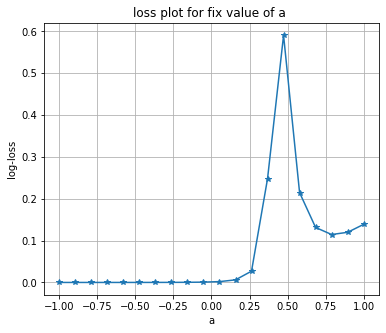

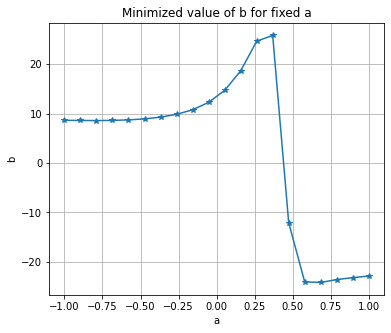

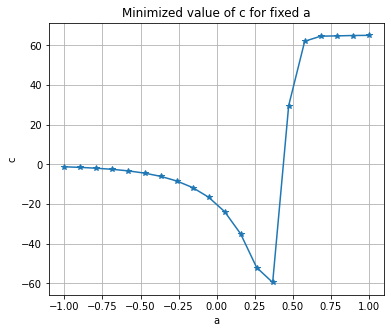

In [30]:
a = np.linspace(-1,1,20)
plt.figure(figsize=(6,5))
plt.plot(a,loss_list,"*-")
plt.grid()
#plt.xticks(a)
plt.xlabel("a")
plt.ylabel("log-loss")
plt.title("loss plot for fix value of a ")
plt.savefig("loss_fixed_a.png")

plt.figure(figsize=(6,5))
plt.plot(a,b_list,"*-")
plt.grid()
#plt.xticks(a)
plt.xlabel("a")
plt.ylabel("b")
plt.title("Minimized value of b for fixed a")
plt.savefig("minimized_b_fixed_a.png")


plt.figure(figsize=(6,5))
plt.plot(a,c_list,"*-")
plt.grid()
plt.xlabel("a")
plt.ylabel("c")
plt.title("Minimized value of c for fixed a")
plt.savefig("minimized_c_fixed_a.png")



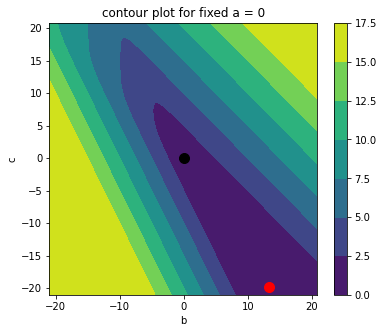

In [12]:
loss_ = []
bb,cc= np.meshgrid(np.arange(-21,21,0.2),np.arange(-21,21,0.2))
b_ = bb.reshape(-1,1)
c_ = cc.reshape(-1,1) 
a_ = 0
x_average_ = focus_(a_,X)
yhat_  = classification_(b_,c_,x_average_) 
#print("Y hat",yhat_)
#Y_ = np.array([list(Y)]*40000)
for i in range(yhat_.shape[0]):
  loss_.append(log_loss(Y,yhat_[i]))
loss_ = np.array(loss_)#,axis=0)
plt.figure(figsize=(6,5))
cs = plt.contourf(b_.reshape(bb.shape),c_.reshape(cc.shape),loss_.reshape(bb.shape))
plt.xlabel("b")
plt.ylabel("c")
plt.colorbar(cs)

plt.scatter(0, 0,c="black",s=100)
plt.scatter(13.330162894370185, -19.759932454851757,c="r",s=100)

plt.title("contour plot for fixed a = "+str(a_) )

plt.savefig("contour_b_c_a_0.png")


In [31]:
minimize_b_c(X,Y,0,0,0)

x average at 0 epoch [1. 1. 2. 2.]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
   
x average [1. 1. 2. 2.]
Y hat [0.00161023 0.00161023 0.99899362 0.99899362]
Loss 0.0013092026416232992 99999


(13.330162894370185, -19.759932454851757, 0.0013092026416232992)

In [32]:
minimize_a(X,Y,0,13.33,-19.75)

x average at 0 epoch [1. 1. 2. 2.]
yhat at 0 epoch [0.00162601 0.00162601 0.99900324 0.99900324]
loss at 0 epoch 0.0013122958897518982
************************************************************
x average [0.8874894  0.8874894  1.97185006 1.97185006]
Y hat [3.63355179e-04 3.63355179e-04 9.98550030e-01 9.98550030e-01]
Loss 0.0009072217760341427 99999


(-0.028157378467334158, 0.0009072217760341427)

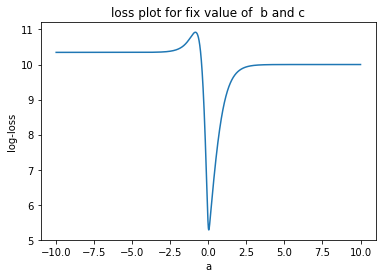

In [33]:
a = np.linspace(-10,10,5000)
loss = []
for a1 in a:
  out =focus_(a1,X)
  #print(out)
  out = classification_(-10,10,out)
  #print(out)
  loss.append(log_loss(Y,out,))

plt.plot(a,loss)
plt.xlabel("a")
plt.ylabel("log-loss")
plt.title("loss plot for fix value of  b and c")
plt.savefig("loss_landscape_b_n10_c_10.png")

In [35]:
# b = np.linspace(-10,10,20)
# c = np.linspace(-10,10,20)
# a_list = []
# #c_list = []
# loss_list = []
# for b1 in b:
#   for c1 in c:
#     a,loss = minimize_a(X,Y,a=0,b=b1,c=c1)
#     a_list.append(a)
#     #c_list.append(c) 
#     #out= classification_(0,0,out)
#     #print(out)
#     loss_list.append(loss)

In [ ]:
# bb,cc= np.meshgrid(b,c)
# len(loss_list)

400

In [13]:
# from mpl_toolkits import mplot3d


# fig = plt.figure()
# ax = plt.axes(projection='3d')

# ax.plot3D(bb.reshape((400)),cc.reshape((400)),loss_list, 'gray')

# ax.set_xlabel('b')
# ax.set_ylabel('c')
# ax.set_zlabel('log-loss');

In [ ]:
# def func_(w):  # only for m = 2
#   return -2*(np.log(1-w[0]-w[1]) + np.log(2*(w[0]+w[1])))  # w[0 ] is b  and w[1] = c


# fmin(func_,[2,0.1],) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


array([2. , 0.1])

# Alternate minimization

In [38]:
a = 0
b = 0
c = 0  

data = pd.DataFrame(columns=["sno","b_c_fixed","a_fixed","a_value","b_value","c_value","loss"]) 

X_average = focus_(a,X)
Yhat = classification_(b,c,X_average)
initial_loss = log_loss(Y,Yhat)

data.loc[0] = [0,True,True,a,b,c,initial_loss]


for i in range(0,40,2):
  print("Minimize b and c")
  b,c,loss = minimize_b_c(X,Y,a,b,c)
  data.loc[i+1] = [i,False,True,a,b,c,loss]
  print("*"*60)
  print("  ")
  print("minimize a")
  a,loss = minimize_a(X,Y,a,b,c)
  data.loc[i+2] = [i,True,False,a,b,c,loss]
  print("  ")


Minimize b and c
x average at 0 epoch [1. 1. 2. 2.]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
   
x average [1. 1. 2. 2.]
Y hat [0.15819193 0.15819193 0.9013021  0.9013021 ]
Loss 0.13805901079919952 999
************************************************************
  
minimize a
x average at 0 epoch [1. 1. 2. 2.]
yhat at 0 epoch [0.15819193 0.15819193 0.9013021  0.9013021 ]
loss at 0 epoch 0.13805901079919952
************************************************************
x average [0.58711758 0.58711758 1.89565555 1.89565555]
Y hat [0.03643254 0.03643254 0.85894477 0.85894477]
Loss 0.09458171862456452 999
  
Minimize b and c
x average at 0 epoch [0.58711758 0.58711758 1.89565555 1.89565555]
yhat at 0 epoch [0.03643254 0.03643254 0.85894477 0.85894477]
loss at 0 epoch 0.09458171862456452
   
x average [0.58711758 0.58711758 1.89565555 1.89565555]
Y hat [0.03835194 0.03835194 0.98025197 0.98025197]
Loss 0.02952617998731775 999
**************************************

In [39]:
data.to_csv("data_1_1.csv",index=False)

In [40]:
a = 0
b = 0
c = 0  

data_1 = pd.DataFrame(columns=["sno","b_c_fixed","a_fixed","a_value","b_value","c_value","loss"]) 

X_average = focus_(a,X)
Yhat = classification_(b,c,X_average)
initial_loss = log_loss(Y,Yhat)

data_1.loc[0] = [0,True,True,a,b,c,initial_loss]


for i in range(0,40,2):
  print("minimize a")
  a,loss = minimize_a(X,Y,a,b,c)
  data_1.loc[i+1] = [i,True,False,a,b,c,loss]
  print("*"*60)
  print("  ")
  print("Minimize b and c")
  b,c,loss = minimize_b_c(X,Y,a,b,c)
  data_1.loc[i+2] = [i,False,True,a,b,c,loss]
  print("  ")


minimize a
x average at 0 epoch [1. 1. 2. 2.]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
************************************************************
x average [1. 1. 2. 2.]
Y hat [0.5 0.5 0.5 0.5]
Loss 0.6931471805599453 999
************************************************************
  
Minimize b and c
x average at 0 epoch [1. 1. 2. 2.]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
   
x average [1. 1. 2. 2.]
Y hat [0.15819193 0.15819193 0.9013021  0.9013021 ]
Loss 0.13805901079919952 999
  
minimize a
x average at 0 epoch [1. 1. 2. 2.]
yhat at 0 epoch [0.15819193 0.15819193 0.9013021  0.9013021 ]
loss at 0 epoch 0.13805901079919952
************************************************************
x average [0.58711758 0.58711758 1.89565555 1.89565555]
Y hat [0.03643254 0.03643254 0.85894477 0.85894477]
Loss 0.09458171862456452 999
************************************************************
  
Minimize b and c
x average at 0 epoch [0.5871

In [41]:
data_1.to_csv("data_1_2.csv",index=False)

# m = 9

In [ ]:
# X1 = np.array([[-1,3,3,3,3,3,3,3,3],[1,3,3,3,3,3,3,3,3],
#                [3,-1,3,3,3,3,3,3,3],[3,1,3,3,3,3,3,3,3],
#                [3,3,-1,3,3,3,3,3,3],[3,3,1,3,3,3,3,3,3],
#                [3,3,3,-1,3,3,3,3,3],[3,3,3,1,3,3,3,3,3],
#                [3,3,3,3,-1,3,3,3,3],[3,3,3,3,1,3,3,3,3],
#                [3,3,3,3,3,-1,3,3,3],[3,3,3,3,3,1,3,3,3],
#                [3,3,3,3,3,3,-1,3,3],[3,3,3,3,3,3,1,3,3],
#                [3,3,3,3,3,3,3,-1,3],[3,3,3,3,3,3,3,1,3],
#                [3,3,3,3,3,3,3,3,-1],[3,3,3,3,3,3,3,3,1],]) # mosaic data m = 9 , d= 1
# Y1 = np.array([0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1])

# m = 50

In [42]:
# X2 = np.ones((50,50))*3
# idx = np.arange(0,50,1)
# X2[idx,idx] =  -1

# X3 = np.ones((50,50))*3
# X3[idx,idx] =  1

# X3 = np.concatenate((X2,X3),axis=0)
# print(X3,X3.shape)

# Y3 = np.zeros((100))
# Y3[50:] = 1
# print(Y3,Y3.shape)

In [ ]:
a = torch.tensor([10.],requires_grad=True)
x = torch.tensor([[3.,-1.]])
out = torch.sum(softmax_(a*x) * x,dim=1)
print(out)

torch.return_types.max(
values=tensor([[30.]], grad_fn=<MaxBackward0>),
indices=tensor([[0]]))
tensor([3.], grad_fn=<SumBackward1>)


In [ ]:
out.backward()

In [ ]:
a.grad

tensor([6.7974e-17])

In [ ]:
l = ( torch.exp(a*x[0,0],) + torch.exp(a*x[0,1]) ) **2


#print(l)


f1 = ( ( ( x[0,0] - x[0,1] ) * torch.exp(a*x[0,0] + a*x[0,1]) ) / l  ) * x[0,0]

f2 = ( ( ( x[0,1] - x[0,0] ) * torch.exp(a*x[0,0] + a*x[0,1]) ) / l  ) * x[0,1]
print(f1.item()+f2.item())

6.797367106130223e-17


In [ ]:
x = np.array([[3,-1]])
a = 10
b = 1
c = 0
y = np.array([1])
xhat = np.sum(softmax(a*x) * x,axis=1)
print(xhat)
yhat = classification_(b,c,xhat)

[3.]


In [ ]:
derv_f(x,xhat,y,yhat,a,b)

[6.79736681e-17]


-3.223710561997351e-18